# An Analysis of the Olympics data in the past 120 years.

The data set contains basic bio data on athletes and medal results from Athens 1896 to Rio 2016.<br>

The kaggle dataset can also be found at- https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data


In [45]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#loading the datasets
df_athletes= pd.read_csv(r"./data/athlete_events.csv")
df_countries=pd.read_csv(r"./data/noc_regions.csv")
df_athletes.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [47]:
df_countries.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [48]:
if (df_countries.shape[0] == df_athletes.shape[0]):
    print("data shapes match")
else:
    print("data shapes do not match")
    print("number of rows in the countries dataset:", df_countries.shape)
    print("number of rows in the athletes dataset:", df_athletes.shape)

data shapes do not match
number of rows in the countries dataset: (230, 3)
number of rows in the athletes dataset: (271116, 15)


In [49]:
#merging the data because the two data sources are containing the countries and athlete data seperately.
df=df_athletes.merge(df_countries, how="left", on="NOC")
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


This is the power of merge. Merge is used to combine 2 dataframes based on a common column. So wherever that value is, that value will be taken based on the common column. we can specify how we merge the 2 dataframes. left,right,inner, outer etc. Similar to SQL joins.

Remember that merge is different from concat cuz concat does not consider a common column. Used to concatenate or stack DataFrames either vertically (row-wise) or horizontally (column-wise), without needing any matching columns or indices. just add them to the axis=0 or axis =1 (horizontally or vertically)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [51]:
#using the set option to only display 10 rows at a time when the data frame is called.
pd.set_option("display.max_rows",5)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [52]:
df.nunique()

ID        135571
Name      134732
           ...  
region       205
notes         21
Length: 17, dtype: int64

There is 135,571 unique contenstant data in the dataset. 271116 rows in the dataset is explained by certain athletes competing for multiple related events in events like athletics.

In [53]:
print(df.duplicated().sum())

1385


In [54]:
#data cleaning  by removing duplicates
df=df.drop_duplicates()
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [55]:
#since notes column is mostly empty, it can be removed from the analysis
df=df.drop(columns= {"notes"})
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


In [56]:
#winter sports
winter_sports=df[df.Season=="Winter"].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [57]:
#summer sports
summer_sports=df[df.Season=="Summer"]
summer_sports.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [58]:
#filtering the data on the best athletes of olympics history 
top_atheletes = df.groupby(['Name','Sex'])['Medal'].count().sort_values(ascending = False)
top_atheletes.head(10)

Name                                             Sex
Michael Fred Phelps, II                          M      28
Larysa Semenivna Latynina (Diriy-)               F      18
                                                        ..
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)  F      12
Ryan Steven Lochte                               M      12
Name: Medal, Length: 10, dtype: int64

In [59]:
#10 oldest people to win gold
oldgold = df[df['Medal']=='Gold'][['Name','Age','Sport']].sort_values('Age',ascending=False)
oldgold.head(10)

,Name,Age,Sport
233390,Oscar Gomer Swahn,64.0,Shooting
105199,Charles Jacobus,64.0,Roque
...,...,...,...
261675,Walter Winans,60.0,Art Competitions
159298,Joshua Kearney Millner,60.0,Shooting


In [60]:
print(f"{(df["Medal"].isnull().sum() / df.shape[0])*100}% of contestants go back home without a medal * 100)")

85.25493918014615% of contestants go back home without a medal * 100)


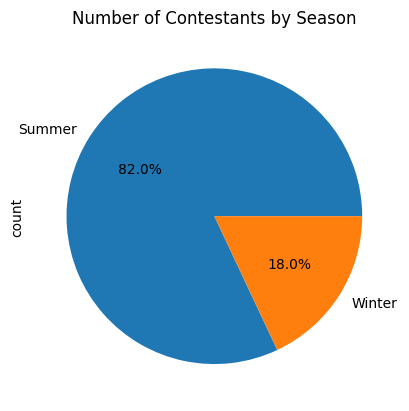

In [61]:
df.Season.value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.title("Number of Contestants by Season")
plt.show()  

## Sri Lankan Athletes in olympics

In [62]:
#get data on srilankan athletes on olympics
sl_athletes=df[df["region"]=="Sri Lanka"]
sl_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
749,429,Ruwani Abeymanne,F,30.0,160.0,53.0,Sri Lanka,SRI,2000 Summer,2000,Summer,Sydney,Shooting,"Shooting Women's Air Pistol, 10 metres",NaN,Sri Lanka
750,429,Ruwani Abeymanne,F,30.0,160.0,53.0,Sri Lanka,SRI,2000 Summer,2000,Summer,Sydney,Shooting,"Shooting Women's Sporting Pistol, 25 metres",NaN,Sri Lanka
751,430,Matthew Duncan Abeysinghe,M,20.0,180.0,74.0,Sri Lanka,SRI,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN,Sri Lanka
6059,3410,Vijitha Padmini Amerasekera,F,30.0,170.0,64.0,Sri Lanka,SRI,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's Javelin Throw,NaN,Sri Lanka
22515,11869,Janaka Biyanwila,M,31.0,NaN,NaN,Sri Lanka,SRI,1996 Summer,1996,Summer,Atlanta,Diving,Diving Men's Springboard,NaN,Sri Lanka


In [63]:
print(f"Historically {sl_athletes.shape[0]} contestants have represented Sri Lanka at Olympic Events")


Historically 146 contestants have represented Sri Lanka at Olympic Events


In [64]:
#filtering data on who has won medals from srilanka
slsl=sl_athletes.fillna("")
slsl[slsl["Medal"]!=""]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
106998,54081,Kameradin Susanthika Jayasinghe,F,24.0,168.0,62.0,Sri Lanka,SRI,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 200 metres,Silver,Sri Lanka
259663,129989,Duncan M. White,M,30.0,,,Sri Lanka,SRI,1948 Summer,1948,Summer,London,Athletics,Athletics Men's 400 metres Hurdles,Silver,Sri Lanka


## Performance by Country

In [65]:
#sort countries by medal count - countries that have historically won most medals. (cumulative)
medal_count = df.groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)
medal_count

NOC
USA    5637
URS    2503
       ... 
AUS    1320
RUS    1165
Name: Medal, Length: 10, dtype: int64

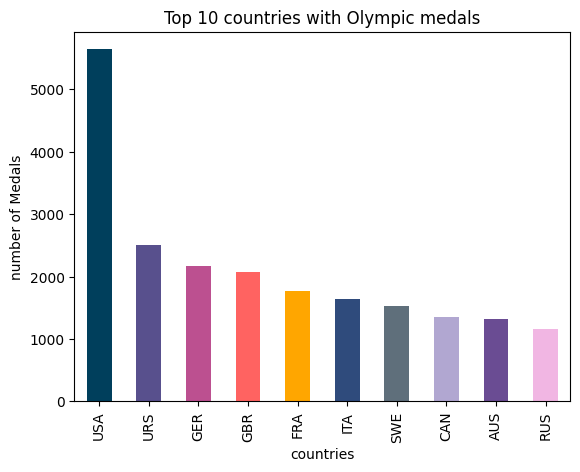

In [66]:
#Top 10 countires with olympic medals
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600', 
          '#2f4b7c', '#5f6f7b', '#b1a7d1', '#6a4c93', '#f1b6e3', 
          '#edc7b7', '#e07b7b', '#6a4e3d', '#cfcfcf', '#9b5f70']
medal_count.plot(kind="bar",title="Top 10 countries with Olympic medals",xlabel="countries", color=colors,ylabel="number of Medals")
plt.show()

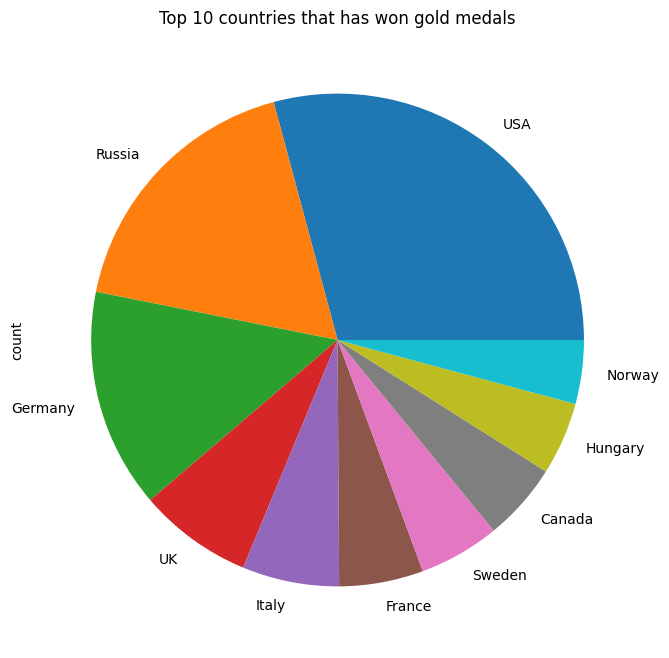

In [67]:
#getting best gold medal countries
goldmedals=df[df.Medal=="Gold"]
gsum=goldmedals.region.value_counts().head(10)
gsum.plot(kind="pie",figsize=(8,8),title="Top 10 countries that has won gold medals")
plt.show()

In [68]:
medal_counts = df.groupby(['Year', 'Team'])['Medal'].count().reset_index()

top_countries = medal_counts.groupby('Team')['Medal'].sum().sort_values(ascending=False).head(10).index

top_countries_data = medal_counts[medal_counts['Team'].isin(top_countries)] #filtering the medal counts with top 10 countries



<Axes: xlabel='Year', ylabel='Medal'>

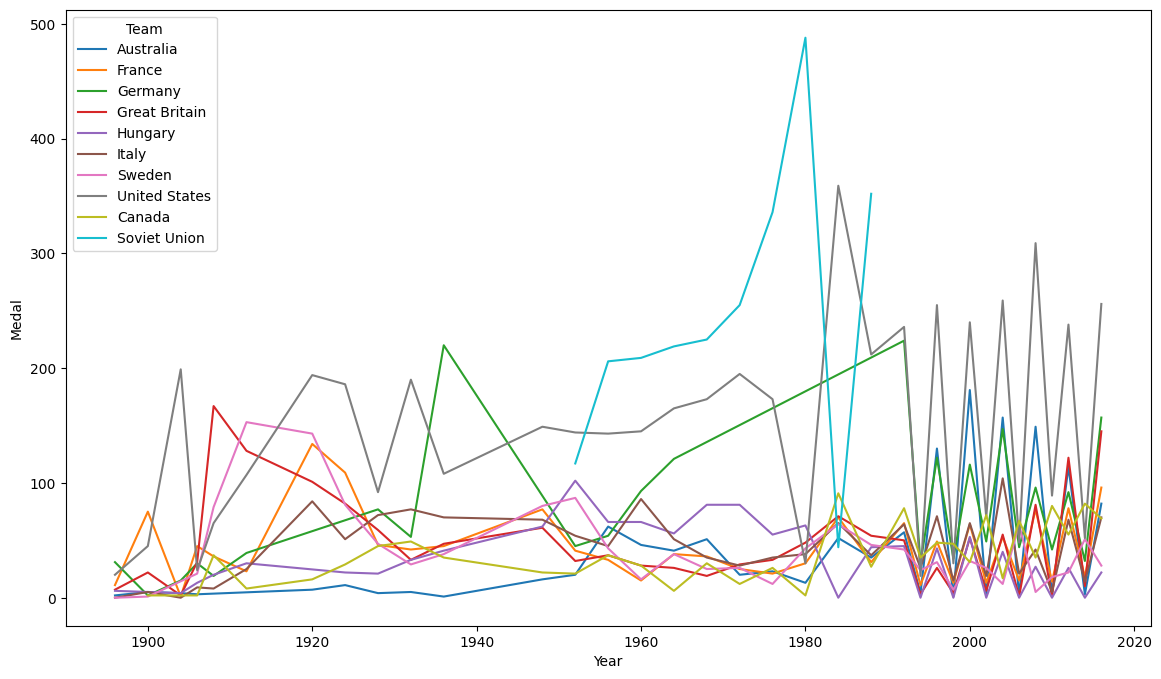

In [69]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_countries_data, x='Year', y='Medal', hue='Team')

The sudden spike of medals in Soviet union and drop after late 1980 can be attributed to the collapse of the soviet union in 1990 and the events that led to it

after around 2000, all the top countries have followed a similar pattern in medal counts.

### Age Distributions

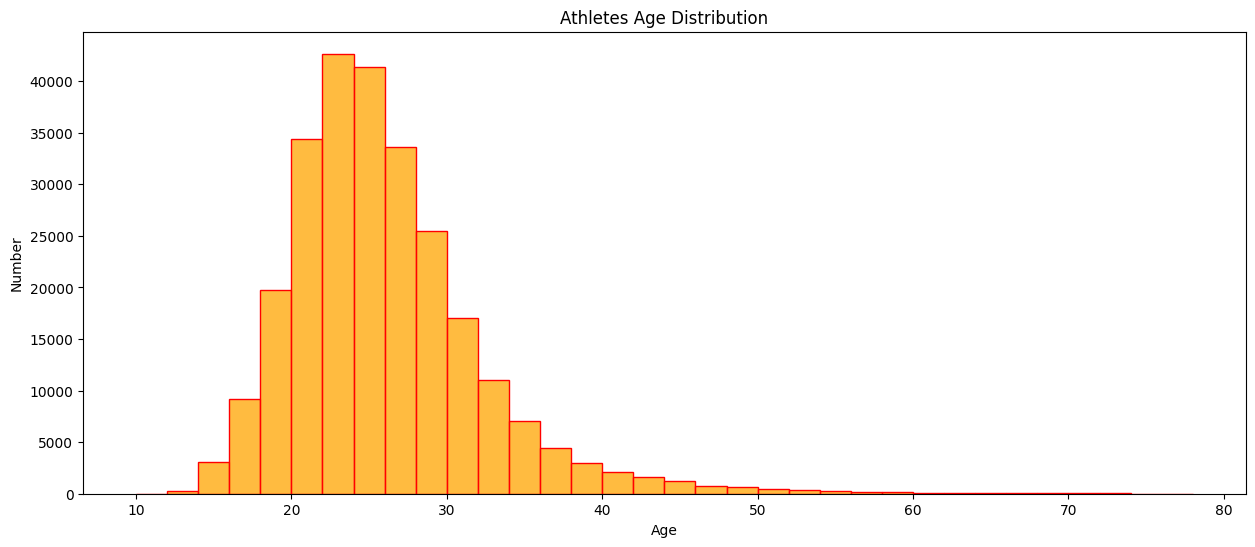

In [70]:
#age distribution histogram using seaborn
plt.figure(figsize=(15,6))
plt.title('Athletes Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number')
sns.histplot(data=df, x='Age',bins=np.arange(10,80,2), color="orange",edgecolor='red')
plt.show()

In [71]:
sport_gender_avg=df.groupby(["Sport","Sex"])["Age"].mean()
sport_gender_avg

Sport          Sex
Aeronautics    M      26.000000
Alpine Skiing  F      22.334609
                        ...    
Wrestling      F      25.305921
               M      25.821827
Name: Age, Length: 116, dtype: float64

count    260416.000000
mean         25.454776
             ...      
75%          28.000000
max          97.000000
Name: Age, Length: 8, dtype: float64

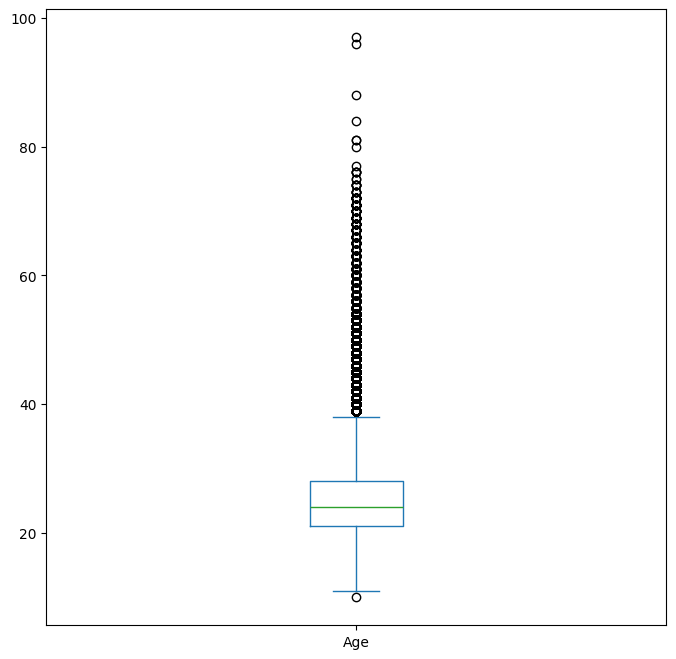

In [72]:
df["Age"].plot(kind="box",figsize=(8,8))
df["Age"].describe()

Most of the athletes are between the ages of 20-30 who compete for olympics.

### Male-Female Demographics in olympics

In [73]:
#male female atheletes of all time in olympics
df.Sex.value_counts()

Sex
M    195353
F     74378
Name: count, dtype: int64

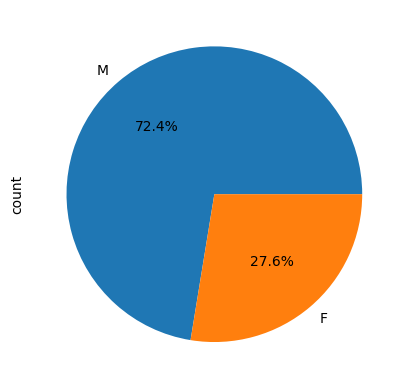

In [74]:
df.Sex.value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.show()

In [75]:
#women in olympics
women=df[(df.Sex == "F")] 

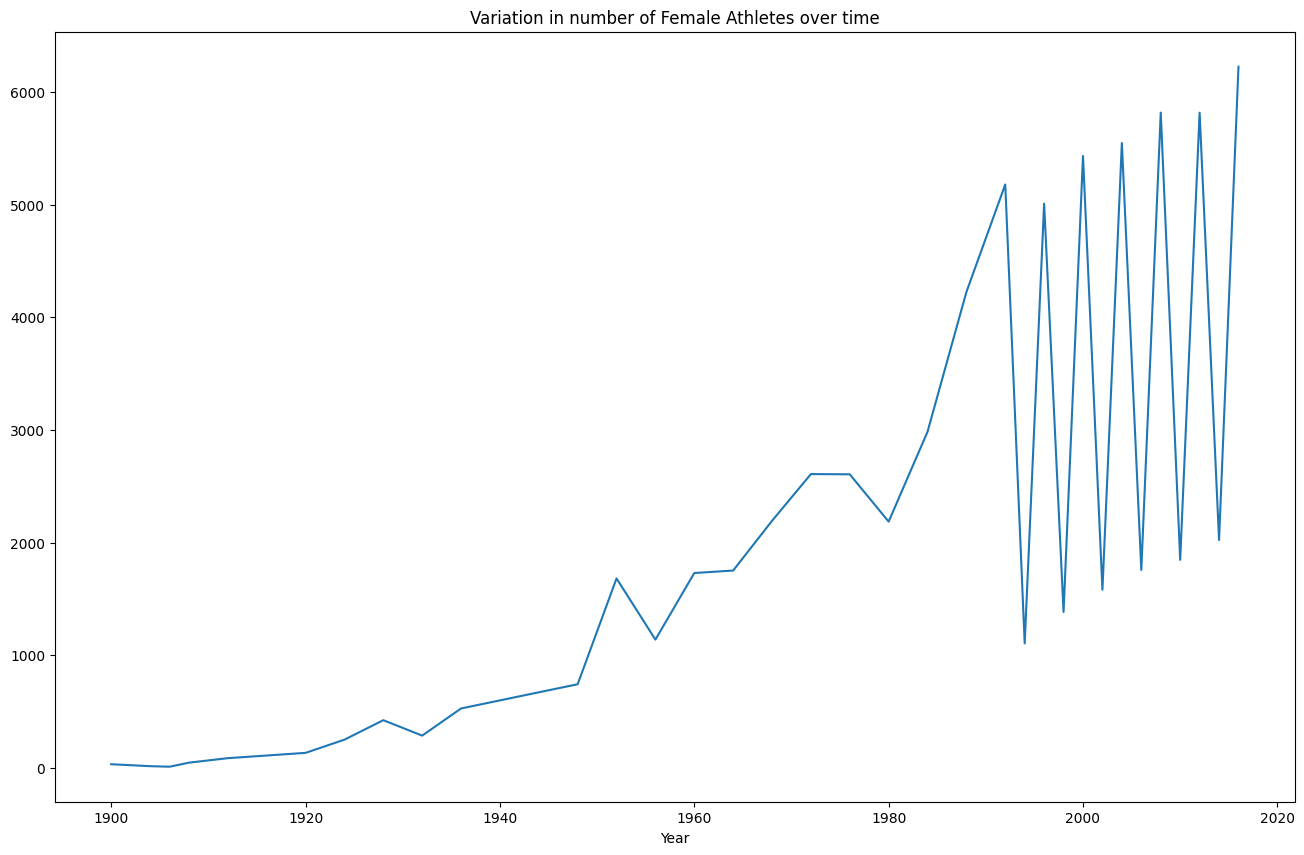

In [76]:
#female participation rates in olmpics
wparticipation = women.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(16, 10))
wparticipation.loc[:,'F'].plot()
plt.title('Variation in number of Female Athletes over time')
plt.show()

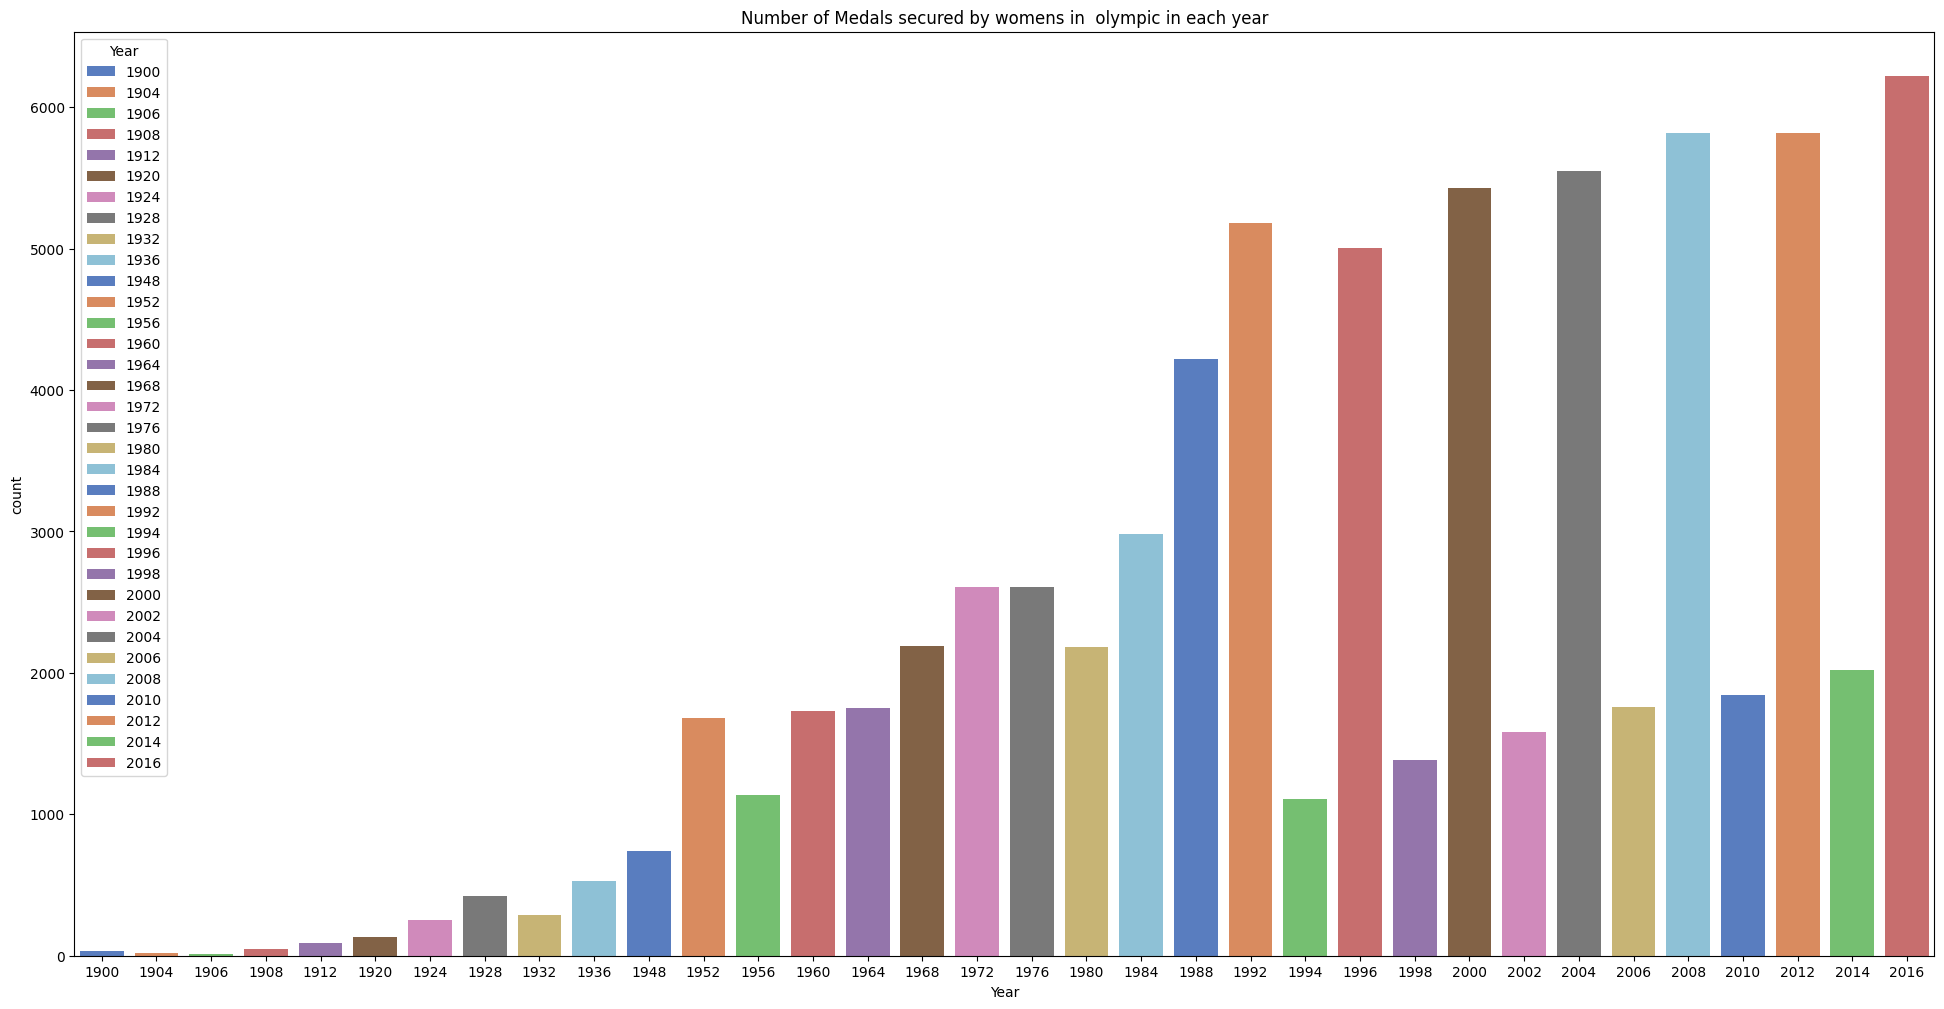

In [77]:
#number of medals secured by women each year
plt.figure(figsize=(24,12))
sns.countplot(data=women , x = 'Year',palette='muted', hue='Year')
plt.title("Number of Medals secured by womens in  olympic in each year")
plt.show()

female participation and the medals won each year by women has steadily increased each year!

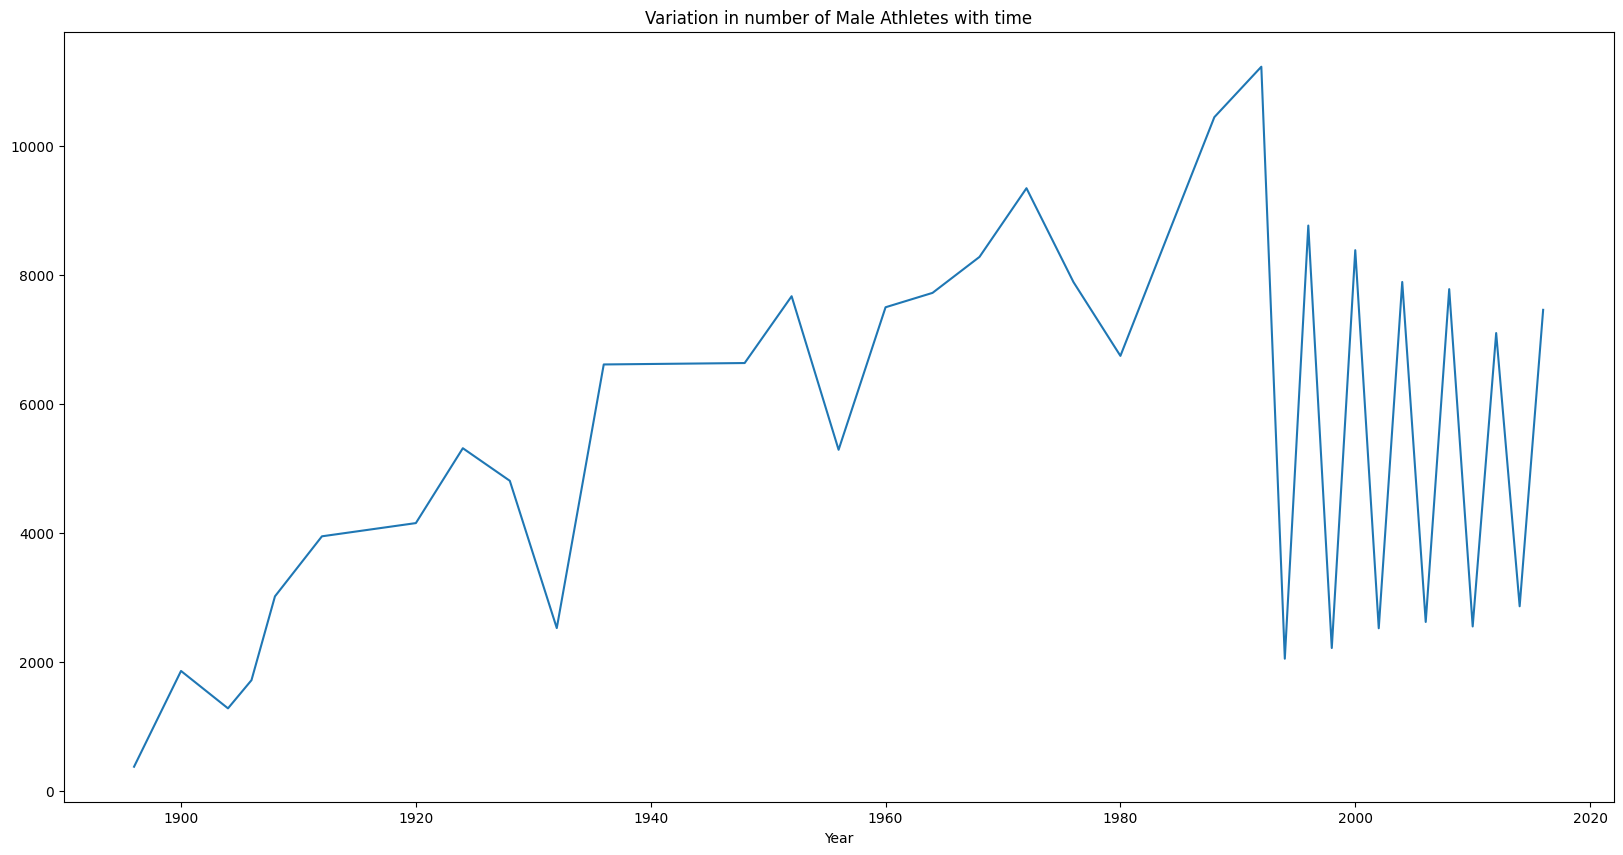

In [78]:
men=df[(df.Sex == "M")] 
Mpart = men.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
Mpart.loc[:,'M'].plot()
plt.title('Variation in number of Male Athletes with time')
plt.show()

Thus we can say that the number of contestant of both ages have increased every year in olympics. So there's a general trend of increasing number of contestants with every Olympic chapter.

### An analysis of Rio Olympics (2016)

In [79]:
# Analysis Rio Olympic in 2016
df_rio = df[df['Year']==2016]
df_rio.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Spain
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Spain
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Spain
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Spain


In [80]:
top_10 = df_rio.groupby('Team')[['Medal']].count()
top_10val=top_10.sort_values('Medal',ascending=False).head(10)

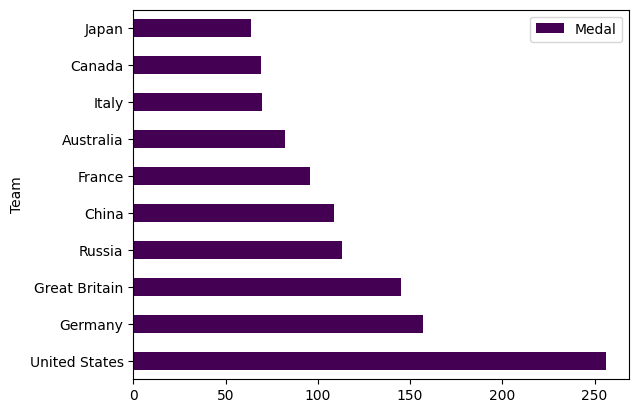

In [81]:
top_10val.plot.barh(colormap="viridis")
plt.show()

## Adding latitudes and Longitudes to countries for mapping

using the dataset: https://www.kaggle.com/datasets/bohnacker/country-longitude-latitude

In [82]:
df_countries

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
...,...,...,...
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [83]:
country_data=pd.read_csv(r"./data/longitude-latitude.csv")
country_data

,Country,ISO-ALPHA-3,ISO-ALPHA-2,IOC,FIFA,Latitude,Longitude,ISO-Name,Historical,WikiData_ID,WikiData_Latitude,WikiData_Longitude,WikiData_Label,WikiData_Description
0,Aruba,ABW,AW,ARU,ARU,12.52111,-69.968338,1,0,Q21203,12.51,-69.97,Aruba,"island country in the Caribbean, part of the K..."
1,Afghanistan,AFG,AF,AFG,AFG,33.93911,67.709953,1,0,Q889,33.00,66.00,Afghanistan,sovereign state situated at the confluence of ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Australasia,NaN,NaN,AUA,NaN,-41.00000,124.000000,0,0,Q45256,-41.00,124.00,Australasia,region of the Pacific Ocean
320,Bohemia,NaN,NaN,BOH,NaN,49.83000,14.330000,0,1,Q39193,49.83,14.33,Bohemia,historical region in the Czech Republic


An interesting observation is that the ISO country codes are different from those defined by the Olympic comittee. The colummn "IOC" relates to the country codes as defined by the International Olympics Committee.

In [84]:
#I'll only need the latitudes and longitudes from this table so dropping everything else
country_data=country_data.filter(items=['IOC', 'Latitude','Longitude'])
country_data

,IOC,Latitude,Longitude
0,ARU,12.52111,-69.968338
1,AFG,33.93911,67.709953
...,...,...,...
319,AUA,-41.00000,124.000000
320,BOH,49.83000,14.330000


In [85]:
df_countries = pd.merge(df_countries, country_data, left_on='NOC', right_on='IOC', how='left') 
#if the common column names in two datasets have different names, we have to specify left on and right on. else, just give the common name to on=""
df_countries

,NOC,region,notes,IOC,Latitude,Longitude
0,AFG,Afghanistan,NaN,AFG,33.939110,67.709953
1,AHO,Curacao,Netherlands Antilles,AHO,12.226079,-69.060087
...,...,...,...,...,...,...
263,ZAM,Zambia,NaN,ZAM,-13.133897,27.849332
264,ZIM,Zimbabwe,NaN,ZIM,-19.015438,29.154857


In [86]:
df_countries=df_countries.drop(columns=['IOC', 'notes'])
df_countries

,NOC,region,Latitude,Longitude
0,AFG,Afghanistan,33.939110,67.709953
1,AHO,Curacao,12.226079,-69.060087
...,...,...,...,...
263,ZAM,Zambia,-13.133897,27.849332
264,ZIM,Zimbabwe,-19.015438,29.154857


In [91]:
df = pd.merge(df_athletes,df_countries, on='NOC',  how='left') 
df.drop_duplicates()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Latitude,Longitude
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,35.861660,104.195397
2,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,35.861660,104.195397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334693,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,51.919438,19.145136
334694,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,51.919438,19.145136


In [93]:
df.to_csv('data/merged_df.csv', index=False)

---
by [Subhanu](https://github.com/subhanu-dev)